## Initial PATH

In [1]:
import os
ROOT_PATH = "/home/jovyan/ChestXray-14"
INPUT_PATH = "/home/jovyan/ChestXray-14/dataset/ChestXray NIH"
INPUT_PATH = os.path.abspath(INPUT_PATH)

In [2]:
BATCH_SIZE = 128 # 128 only on Binary Classification
IMG_SIZE = 224
SEED = 42

In [3]:
EXPERIMENT_NAME = "binary_dataset"
OUT_PATH = os.path.abspath(f"{INPUT_PATH}/data/{EXPERIMENT_NAME}")
OUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/Binary Classification'

## Load Full Dataset

In [4]:
import pandas as pd
DEFAULT_DISPLAY_ROWS = 10 # defualt is 10
pd.set_option('display.max_rows', DEFAULT_DISPLAY_ROWS)

In [5]:
FILE_PATH = f"{INPUT_PATH}/preprocessed_data.csv"

In [6]:
df = pd.read_csv(FILE_PATH, index_col=0)
df = df.reset_index()
df["index"] = df["index"].apply(
    lambda x: os.path.abspath(f"{ROOT_PATH}/{x}")
)
df = df.set_index("index")
df

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000003_000.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030801_001.png,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030802_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030803_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing

In [7]:
import numpy as np
import sys
sys.path.append('/home/jovyan/ChestXray-14')

In [8]:
from tqdm.notebook import tqdm
from modules.utils import serialize_fold

2023-03-29 12:48:16.732782: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.utils import shuffle

df = df.astype("int16")
df = shuffle(df, random_state=SEED)
# df["Abnormal"] = (df["No Finding"] == 0).astype('int16')
df_temp = df[["No Finding"]].copy()
df1, df2, df3, df4, df5 = np.split(df_temp, 5)
NUM_TO_SPLIT_FILES = 100

In [11]:
df_temp

,No Finding
index,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00022260_003.png,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012048_007.png,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_007/images/00014352_005.png,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00006040_001.png,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00011202_002.png,1
...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00018865_040.png,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030028_001.png,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027679_000.png,1


## EDA

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 0             Count
Abnormal    41495
No Finding  48201
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


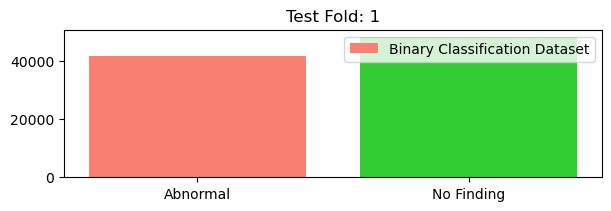

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 1             Count
Abnormal    41375
No Finding  48321
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


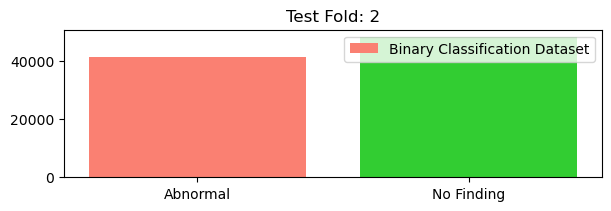

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 2             Count
Abnormal    41452
No Finding  48244
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


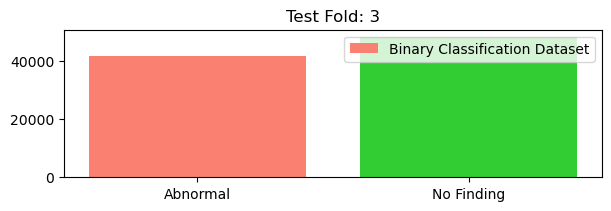

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 3             Count
Abnormal    41280
No Finding  48416
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


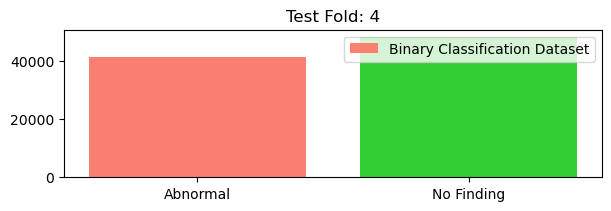

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Fold 4             Count
Abnormal    41434
No Finding  48262
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


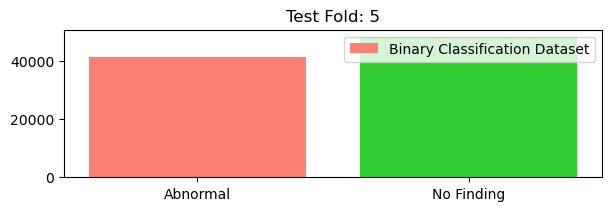

In [12]:
import matplotlib.pyplot as plt

def plot_label_histogram(fold_num, df_train):
    
    count_class = {}
    for each_class in df_train.columns[:] :
        df_new = df_train[each_class].value_counts() 
        count_class["Abnormal"] = [df_new[0]]
        count_class[df_new.name] = [df_new[1]]

    df_count_class = pd.DataFrame(count_class).T
    df_count_class.set_axis(["Count"], axis="columns", inplace=True)

    print("======== " * 10)
    print(f"Fold {fold_num}", df_count_class)
    
    print(f"""\
    Dataset Infomation:
        >> Train: {len(df_train) :,}
        >> Test: {len(df_test) :,}
        >> Total: {len(df_train) + len(df_test) :,}
    """)
    
    fig, ax1 = plt.subplots(
        nrows=1, 
        ncols=1,
        constrained_layout = True,
        figsize=(6,2)
    )

    plt.title(f"Test Fold: {fold_num+1}")
    X_LABELS = df_count_class.index
    X_axis = np.arange(len(df_count_class))
    ax1.set_xticks(X_axis, X_LABELS)

    ax1.bar(X_axis, df_count_class["Count"], 0.8, label="Binary Classification Dataset",
            color=["Salmon", "limegreen"])
    plt.legend()
    plt.show()
    
    
for (fold_num, (df_train, df_test)) in enumerate([
    (pd.concat([df2, df3, df4, df5]), df1),
    (pd.concat([df1, df3, df4, df5]), df2),
    (pd.concat([df1, df2, df4, df5]), df3),
    (pd.concat([df1, df2, df3, df5]), df4),
    (pd.concat([df1, df2, df3, df4]), df5)
        ]):
    
    plot_label_histogram(fold_num, df_train)

## Writea File as Binary

In [13]:
class Directory:
    def create_folds_folder(self):
        os.makedirs(os.path.join(INPUT_PATH, "data", "binary_dataset", "folds", "fold1"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "binary_dataset", "folds", "fold2"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "binary_dataset", "folds", "fold3"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "binary_dataset", "folds", "fold4"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", "binary_dataset", "folds", "fold5"), exist_ok=True)
        
NUM_TO_SPLIT_FILES = 100
Directory().create_folds_folder()

In [14]:


# Fold1
tfrec_path = f'{INPUT_PATH}/data/binary_dataset/folds/fold1'
for i, fold in tqdm(enumerate(np.array_split(df1, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold2
tfrec_path = f'{INPUT_PATH}/data/binary_dataset/folds/fold2'
for i, fold in tqdm(enumerate(np.array_split(df2, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold3
tfrec_path = f'{INPUT_PATH}/data/binary_dataset/folds/fold3'
for i, fold in tqdm(enumerate(np.array_split(df3, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold4
tfrec_path = f'{INPUT_PATH}/data/binary_dataset/folds/fold4'
for i, fold in tqdm(enumerate(np.array_split(df4, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')

# Fold5
tfrec_path = f'{INPUT_PATH}/data/binary_dataset/folds/fold5'
for i, fold in tqdm(enumerate(np.array_split(df5, NUM_TO_SPLIT_FILES)), total=NUM_TO_SPLIT_FILES):
    serialize_fold(fold, name=f'{tfrec_path}/{i:03d}-{len(fold):03d}')
    
print("Done Preparing!!")


  0%|          | 0/100 [00:00<?, ?it/s]

2023-03-29 12:48:18.960834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 12:48:19.449879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8013 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 2g.10gb, pci bus id: 0000:31:00.0, compute capability: 8.0


  0%|          | 0/100 [00:00<?, ?it/s]

2023-03-29 12:59:33.830785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

2023-03-29 13:25:11.391664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


Done Preparing!!


In [15]:
!nvidia-smi

Wed Mar 29 13:26:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:31:00.0 Off |                   On |
| N/A   43C    P0   151W / 400W |                  N/A |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| MIG d